In [1]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, Javascript, Image

from base64 import b64decode, b64encode
import PIL
import io
import html
import time
import math



In [3]:
# define a video capture object edit the number to find the webcam
vid = cv2.VideoCapture(0) 
  
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, image = vid.read() 
    # Read the Image
    
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Splitting the HSV image into its components
    h, s, v = cv2.split(hsv)

    # Define lower and upper thresholds for value segmentation
    lower_value_threshold = 0
    upper_value_threshold = 150 

    # Define lower and upper thresholds for value segmentation
    lower_hue_threshold = 30
    upper_hue_threshold = 90 

    # Create a binary mask based on value thresholds
    value_mask = cv2.inRange(v, lower_value_threshold, upper_value_threshold)

    # Create a binary mask based on hue thresholds
    hue_mask = cv2.inRange(h, lower_hue_threshold, upper_hue_threshold)

    # Combine the value and hue mask
    composite_mask = cv2.bitwise_and(value_mask, hue_mask)

    # Apply the mask to the original image to remove shadows
    segmented_image = cv2.bitwise_and(image, image, mask=composite_mask) 

    # Convert Image to Grayscale
    img_gry = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    # Equalize the contrast of the image
    equalized = cv2.equalizeHist(img_gry)

    # Apply Gaussian blurring
    img_blur = cv2.GaussianBlur(equalized, (5,5), 0) 

    # Apply Otsubin thresholding
    ret, img_Otsubin = cv2.threshold(img_gry,10,255,cv2.THRESH_BINARY)

    imagetocanny = img_Otsubin

    edges = cv2.Canny(image=imagetocanny, threshold1=200, threshold2=200) # Canny Edge Detection


    '''
    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 15  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 100  # minimum number of pixels making up a line
    max_line_gap = 30  # maximum gap in pixels between connectable line segments
    line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on
    '''

    line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image. Output lines are an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, 1, np.pi/100, 15, np.array([]),
                        100, 30)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),(255,0,0),5)

  
    # Display the resulting frame 
    cv2.imshow('frame', image) 
      
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 



TypeError: 'NoneType' object is not iterable

: 

Found blue pixel for left at (337, 416)
Here is the right distance: 428.5067093990478
Found blue pixel for ceneter at (640, 134)
Here is the right distance: 585.0
Found blue pixel for right at (875, 484)
Here is the right distance: 332.34018715767735


<Figure size 2000x2000 with 0 Axes>

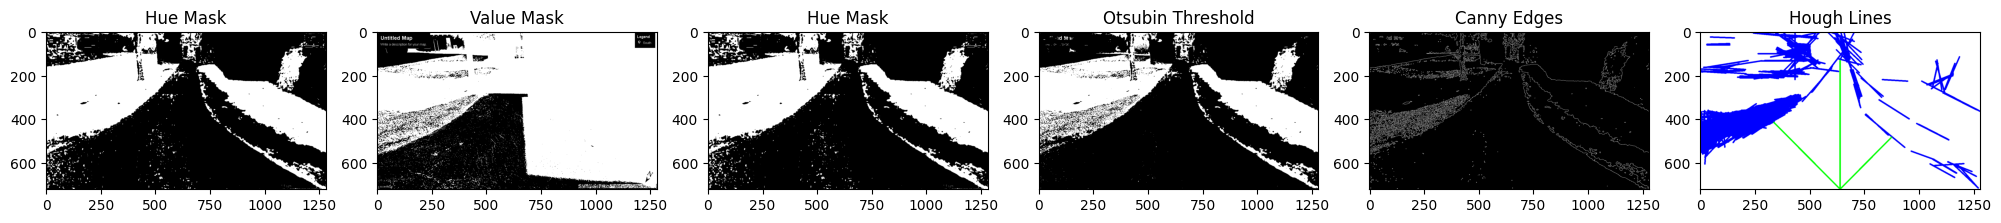

In [54]:
# Read the IMage
image = cv2.imread('./Sidewalks/P1.jpg',cv2.IMREAD_UNCHANGED)
whiteboard = cv2.imread('./Sidewalks/whitebox.png', cv2.IMREAD_UNCHANGED)

# Convert BGR image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Splitting the HSV image into its components
h, s, v = cv2.split(hsv)

# Define lower and upper thresholds for value segmentation
lower_value_threshold = 0
upper_value_threshold = 150 

# Define lower and upper thresholds for value segmentation
lower_hue_threshold = 30
upper_hue_threshold = 90 

# Create a binary mask based on value thresholds
value_mask = cv2.inRange(v, lower_value_threshold, upper_value_threshold)

# Create a binary mask based on hue thresholds
hue_mask = cv2.inRange(h, lower_hue_threshold, upper_hue_threshold)

# Combine the value and hue mask
composite_mask = cv2.bitwise_and(value_mask, hue_mask)

# Apply the mask to the original image to remove shadows
segmented_image = cv2.bitwise_and(image, image, mask=composite_mask) 

# Convert Image to Grayscale
img_gry = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2GRAY)

# Equalize the contrast of the image
equalized = cv2.equalizeHist(img_gry)

# Apply Gaussian blurring
img_blur = cv2.GaussianBlur(equalized, (5,5), 0) 

# Apply Otsubin thresholding
ret, img_Otsubin = cv2.threshold(img_gry,10,255,cv2.THRESH_BINARY)

imagetocanny = img_Otsubin

edges = cv2.Canny(image=imagetocanny, threshold1=200, threshold2=200) # Canny Edge Detection


'''
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 30  # maximum gap in pixels between connectable line segments
line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on
'''


# Run Hough on edge detected image. Output lines are an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, 1, np.pi/100, 15, np.array([]),
                    100, 30)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(whiteboard,(x1,y1),(x2,y2),(255,0,0),5)


# Left line
y1 = 719
x1 = 640
while x1 > 0:
    pixel_color = whiteboard[y1, x1]  # OpenCV uses (row, column) indexing

    # Assuming OpenCV uses BGR format for color representation
    if all(pixel_color == [255, 0, 0, 0]):  # Checking for blue color (assuming BGR values)
        print(f"Found blue pixel for left at ({x1}, {y1})")
        # If you want to stop at the first blue pixel, you can break here
        break
    # Move up one pixel on the line
    y1 -= 1
    x1 -= 1
cv2.line(whiteboard,(x1,y1),(640,720),(0,255,0),5)
distance1 = math.hypot(640 - x1, 719 - y1)
print(f"Here is the right distance: {distance1}")

# Center line
y2 = 719
x2 = 640
while y2 > 0:
    pixel_color = whiteboard[y2, x2]  # OpenCV uses (row, column) indexing

    # Assuming OpenCV uses BGR format for color representation
    if all(pixel_color == [255, 0, 0, 0]):  # Checking for blue color (assuming BGR values)
        print(f"Found blue pixel for ceneter at ({x2}, {y2})")

        # If you want to stop at the first blue pixel, you can break here
        break
    # Move up one pixel on the line
    y2 -= 1
cv2.line(whiteboard,(640,y2),(640,720),(0,255,0),5)
distance2 = math.hypot(640 - x2, 719 - y2)
print(f"Here is the right distance: {distance2}")

# Right line
y3 = 719
x3 = 640
while x3 < 1280:
    pixel_color = whiteboard[y3, x3]  # OpenCV uses (row, column) indexing

    # Assuming OpenCV uses BGR format for color representation
    if all(pixel_color == [255, 0, 0, 0]):  # Checking for blue color (assuming BGR values)
        print(f"Found blue pixel for right at ({x3}, {y3})")
        # If you want to stop at the first blue pixel, you can break here
        break
    # Move up one pixel on the line
    y3 -= 1
    x3 += 1
cv2.line(whiteboard,(x3,y3),(640,720),(0,255,0),5)

distance3 = math.hypot(640 - x3, 719 - y3)
print(f"Here is the right distance: {distance3}")


    
plt.figure(figsize = (20,20))

plt.figure(figsize=(20, 5))


plt.subplot(1, 6, 1)
plt.imshow(hue_mask, cmap='gray')
plt.title('Hue Mask')

plt.subplot(1, 6, 2)
plt.imshow(value_mask, cmap='gray')
plt.title('Value Mask')

plt.subplot(1, 6, 3)
plt.imshow(hue_mask, cmap='gray')
plt.title('Hue Mask')

plt.subplot(1, 6, 4)
plt.imshow(img_Otsubin, cmap='gray')
plt.title('Otsubin Threshold')

plt.subplot(1, 6, 5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(whiteboard, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines')

plt.tight_layout()
plt.show()


In [2]:
# define a video capture object edit the number to find the webcam
vid = cv2.VideoCapture(2) 
# whiteboard = cv2.imread('./Sidewalks/whiteboxcomputer.png', cv2.IMREAD_UNCHANGED)
white_image = np.ones((1080, 1920, 3), np.uint8) * 256 
  
while(True): 
    whiteboard = np.ones((1080, 1920, 3), np.uint8) * 256 
    # Capture the video frame 
    # by frame 
    ret, image = vid.read()
    y = image.shape[0]
    x = image.shape[1]
    halfx = int(x/2)
    yless = y - 1

    # Read the Image
    
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Splitting the HSV image into its components
    h, s, v = cv2.split(hsv)

    # Define lower and upper thresholds for value segmentation
    lower_value_threshold = 0
    upper_value_threshold = 150 

    # Define lower and upper thresholds for value segmentation
    lower_hue_threshold = 30
    upper_hue_threshold = 90 

    # Create a binary mask based on value thresholds
    value_mask = cv2.inRange(v, lower_value_threshold, upper_value_threshold)

    # Create a binary mask based on hue thresholds
    hue_mask = cv2.inRange(h, lower_hue_threshold, upper_hue_threshold)

    # Combine the value and hue mask
    composite_mask = cv2.bitwise_and(value_mask, hue_mask)

    # Apply the mask to the original image to remove shadows
    segmented_image = cv2.bitwise_and(image, image, mask=composite_mask) 

    # Convert Image to Grayscale
    img_gry = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    # Equalize the contrast of the image
    equalized = cv2.equalizeHist(img_gry)

    # Apply Gaussian blurring
    img_blur = cv2.GaussianBlur(equalized, (5,5), 0) 

    # Apply Otsubin thresholding
    ret, img_Otsubin = cv2.threshold(img_gry,10,255,cv2.THRESH_BINARY)

    imagetocanny = img_Otsubin

    edges = cv2.Canny(image=imagetocanny, threshold1=200, threshold2=200) # Canny Edge Detection


    '''
    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 15  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 100  # minimum number of pixels making up a line
    max_line_gap = 30  # maximum gap in pixels between connectable line segments
    line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on
    '''

    line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image. Output lines are an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, 1, np.pi/100, 15, np.array([]),
                        100, 30)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),(255,0,0),5)
            cv2.line(whiteboard,(x1,y1),(x2,y2),(255,0,0),5)

    result = []
    # Left line
    y1 = y - 1
    x1 = halfx
    while x1 > 0:
        pixel_color = whiteboard[y1, x1]  # OpenCV uses (row, column) indexing

        # Assuming OpenCV uses BGR format for color representation
        if all(pixel_color == [255, 0, 0]):  # Checking for blue color (assuming BGR values)
            # If you want to stop at the first blue pixel, you can break here
            break
        # Move up one pixel on the line
        y1 -= 1
        x1 -= 1
    cv2.line(image,(x1,y1),(halfx,y),(0,255,0),5)
    result.append(int(math.hypot(halfx - x1, yless - y1)))

    # Center line
    y2 = yless
    x2 = halfx
    while y2 > 0:
        pixel_color = whiteboard[y2, x2]  # OpenCV uses (row, column) indexing

        # Assuming OpenCV uses BGR format for color representation
        if all(pixel_color == [255, 0, 0]):  # Checking for blue color (assuming BGR values)

            # If you want to stop at the first blue pixel, you can break here
            break
        # Move up one pixel on the line
        y2 -= 1
    cv2.line(image,(halfx,y2),(halfx,y),(0,255,0),5)

    result.append(int(math.hypot(halfx - x2, 719 - y2)))

    # Right line
    y3 = yless
    x3 = halfx
    while x3 < x:
        pixel_color = whiteboard[y3, x3]  # OpenCV uses (row, column) indexing

        # Assuming OpenCV uses BGR format for color representation
        if all(pixel_color == [255, 0, 0]):  # Checking for blue color (assuming BGR values)
            # If you want to stop at the first blue pixel, you can break here
            break
        # Move up one pixel on the line
        y3 -= 1
        x3 += 1
    cv2.line(image,(x3,y3),(halfx,y),(0,255,0),5)

    result.append(distance3 = int(math.hypot(halfx - x3, 719 - y3)))
    print(result)
    # Display the resulting frame 
    cv2.imshow('frame', image) 
      
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 



[342, 719, 473]
[1357, 131, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 1132]
[1357, 719, 

: 

In [1]:
import cv2

vid = cv2.VideoCapture(2) 
while(True): 
    ret, image = vid.read()
    cv2.imshow('frame', image) 
    print(image.shape[1])
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1

: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


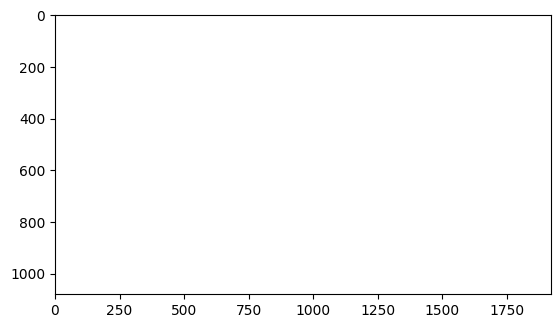

In [6]:
white_image = np.ones((1080, 1920, 3), np.uint8) * 256 
plt.imshow(cv2.cvtColor(white_image, cv2.COLOR_BGR2RGB))
